In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from google.colab import files
from collections import deque

In [3]:
uploaded = files.upload()

Saving mnist.csv to mnist.csv


In [71]:
file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)   #10000개
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
train_image  = np.empty((size_row * size_col, 6000), dtype=float)
train_label  = np.empty(6000, dtype=int)
test_image  = np.empty((size_row * size_col, 4000), dtype=float)
test_label  = np.empty(4000, dtype=int)

for line in data:
    if count < 6000 :
      line_data   = line.split(',')
      label       = line_data[0]
      im_vector   = np.asfarray(line_data[1:])
      im_vector   = normalize(im_vector)

      train_label[count]       = label       # size : 10000
      train_image[:, count]    = im_vector   # size : 784 * 10000

    else: 
      line_data   = line.split(',')
      label       = line_data[0]
      im_vector   = np.asfarray(line_data[1:])
      im_vector   = normalize(im_vector)

      test_label[count-6000]       = label       # size : 10000
      test_image[:, count-6000]    = im_vector   # size : 784 * 10000

    count += 1
#
# plot first 150 images out of 10,000 with their labels
#
"""
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()
"""
train_costs = deque()
test_costs = deque()
theta_0s = deque()
theta_1s = deque()
theta_2s = deque()
bias_0s = deque()
bias_1s = deque()
bias_2s = deque()
iters = deque()

print(num_image)  #10000
print(len(train_image))  #784
print(len(train_image[0]))  #6000
print(len(train_label))  #6000
print(len(test_image))  #784
print(len(test_image[0]))  #4000
print(len(test_label))  #4000
#list_label 0~5999까지 training data, 6000~9999까지 test data
#list_image [:,5999]까지 training data, [:,9999]까지 test data

10000
784
6000
6000
784
4000
4000


In [0]:
def forward(theta, value):
  #print(theta.shape, value.shape)
  result = np.matmul(theta, value)
  return result

In [0]:
def sigmoid(value):
  """
  length = len(value)
  for i in range(0, length):
    value[i] = 1 / (1 + np.exp(-value[i]))
  """
  value = value.astype(float)
  value = np.multiply(value,-1)
  value = np.exp(value)
  value = np.add(1,value)
  value = np.divide(1, value)
  return value

In [0]:
def addBias(value, bias):
  """
  length = len(bias)
  for i in range(0, length):
    value[i] += bias[i]
  """
  value = np.add(value, bias)
  return value

In [0]:
def neuralNet(x, u, v, w, bias0, bias1, bias2):    #data, theta0, theta1, theta2, bias0, bias1, bias2
  y_hat = forward(u, x)
  y_hat = addBias(y_hat, bias0)
  y = sigmoid(y_hat)
  z_hat = forward(v, y)
  z_hat = addBias(z_hat, bias1)
  z = sigmoid(z_hat)
  h_hat = forward(w, z)
  h_hat = addBias(h_hat, bias2)
  h = sigmoid(h_hat)
  return y, z, h

In [0]:
def objectiveFunction(image, label, theta0, theta1, theta2, b0, b1, b2):     #list_image[:, count], list_label -> traing과 test 구분해야겠다.!!
  length = len(label)                    #두는 이유는 trainig 6000, test 4000개  갯수가 달라서
  cost = 0
  for i in range(0, length):
    y, z, outputs = neuralNet(image[:,i], theta0, theta1, theta2, b0, b1, b2)  #size = 10x1 good!!!
    for j in range(0, 10):
      cost += (-label[i] * np.log(outputs[j]) - (1-label[i])*np.log(1-outputs[j])) 
  cost /= length
  return cost

In [78]:
def gradientDescent(image, label, theta0, theta1, theta2, b0, b1, b2, learning_rate):
  lr = learning_rate
  length = len(label)
  for i in range(0, length):
    x = image[:,i]
    y, z, h = neuralNet(image[:,i], theta0, theta1, theta2, b0, b1, b2)
    l = label[i]

    ##first layer
    temp1 = np.zeros(10)
    temp1 = np.subtract(h, l)
    temp = np.multiply(temp1, lr/length)
    b2 = np.subtract(b2, temp)

    z_transpose = np.reshape(z, (1,49))
    temp1 = np.reshape(temp1, (10,1))
    temp2 = np.zeros((10,49))
    temp2 = np.matmul(temp1, z_transpose)
    temp = np.multiply(temp2, lr/length)
    theta2 = np.subtract(theta2, temp)
    
    ##second layer
    temp3 = np.zeros(49)
    temp1 = np.subtract(h, l)                 #그전의 temp1을 가져와서 썼더니, 차원 size forward matmul에서 차원이 틀려서 안됨!
    temp3 = np.matmul(temp1, theta2)
    temp3 = np.multiply(temp3, z)
    temp3 = np.multiply(temp3, 1-z)
    temp = np.multiply(temp3, lr/length)
    b1 = np.array(np.subtract(b1, temp), dtype=object)

    temp4 = np.zeros((49,196))
    temp3 = np.reshape(temp3, (49,1))
    y_transpose = np.reshape(y, (1,196))
    #print(temp3.shape)
    #print(y_transpose.shape)
    temp4 = np.matmul(temp3, y_transpose)
    theta1 = np.array(np.subtract(theta1, temp4), dtype=object)

    ##third layer
    temp5 = np.zeros(196)
    temp1 = np.subtract(h, l)
    temp5 = np.matmul(temp1, theta2)
    temp5 = np.multiply(temp5, z)
    temp5 = np.multiply(temp5, 1-z)
    theta1 = np.reshape(theta1, (49, 196))
    temp5 = np.matmul(temp5, theta1)
    temp5 = np.multiply(temp5, y)
    temp5 = np.multiply(temp5, 1-y)
    temp = np.multiply(temp5, lr/length)
    b0 = np.array(np.subtract(b0, temp), dtype=object)

    temp6 = np.zeros((196, 784))
    temp5 = np.reshape(temp5, (196,1))
    x_transpose = np.reshape(x, (1,784))
    #print(temp3.shape)
    #print(y_transpose.shape)
    temp6 = np.matmul(temp5, x_transpose)
    theta0 = np.array(np.subtract(theta0, temp6), dtype=object)

  return b2, theta2, b1, theta1, b0, theta0

"""  



    ## first layer update
    for j in range(0, 10):
      estimate1 = (-label[i] + h[j])
      b2[j] -= lr * estimate1       #bias2 update!
      
      for k in range(0, 49):
        estimate2 = estimate1 * z[k]
        theta2[j][k] -= lr * estimate2   #theta2 update!
    
    ## second layer update
    for l in range(0, 196):
      for j in range(0, 49):
        estimate3 = 0
        for k in range(0, 10):
          estimate3 += (-label[i] + h[k]) * theta1[k][j]
        b1[j] -= lr * z[j] * (1 - z[j]) * estimate3
        theta1[j][l] -= b1[j] * y[l]
"""

'  \n\n\n\n    ## first layer update\n    for j in range(0, 10):\n      estimate1 = (-label[i] + h[j])\n      b2[j] -= lr * estimate1       #bias2 update!\n      \n      for k in range(0, 49):\n        estimate2 = estimate1 * z[k]\n        theta2[j][k] -= lr * estimate2   #theta2 update!\n    \n    ## second layer update\n    for l in range(0, 196):\n      for j in range(0, 49):\n        estimate3 = 0\n        for k in range(0, 10):\n          estimate3 += (-label[i] + h[k]) * theta1[k][j]\n        b1[j] -= lr * z[j] * (1 - z[j]) * estimate3\n        theta1[j][l] -= b1[j] * y[l]\n'

In [0]:
def accuracy_check(predict_index, image, )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


Plotting the loss curve


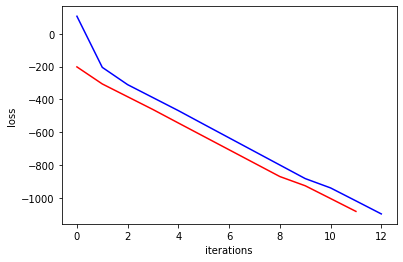

In [79]:
def main():
  mu = 0
  sigma = 1

  theta_0 = np.random.normal(mu, sigma, size=(196,784))   #size = 196x784
  theta_1 = np.random.normal(mu, sigma, size=(49,196))    #size = 49x196
  theta_2 = np.random.normal(mu, sigma, size=(10,49))     #size = 10x49
  
  b_0 = np.random.normal(mu, sigma, 196)                  #size = 196x1
  b_1 = np.random.normal(mu, sigma, 49)                   #size = 49x1
  b_2 = np.random.normal(mu, sigma, 10)                   #size = 10x1

  lr = 0.03                                                #learning rate

  #training step
  for iter in range(0, 30):
    train_cost = objectiveFunction(train_image, train_label, theta_0, theta_1, theta_2, b_0, b_1, b_2)  #print(cost)
    train_costs.append(train_cost)
    b_2, theta_2, b_1, theta_1, b_0, theta_0 = gradientDescent(train_image, train_label, theta_0, theta_1, theta_2, b_0, b_1, b_2, lr)
    test_cost = objectiveFunction(test_image, test_label, theta_0, theta_1, theta_2, b_0, b_1, b_2)
    test_costs.append(test_cost)
    iters.append(iter)

    train_y, train_z, train_h = neuralNet(train_image, theta_0, theta_1, theta_2, b_0, b_1, b_2)
    train_index = np.argmax(train_h)
    if train_index == 
    #print(theta_1)
    #print(theta_2)
    #print(b_0)
    #print(theta_0)
  
  print("Plotting the loss curve")
  fig = plt.figure()
  graph1 = plt.plot(iters, train_costs, 'b')
  graph2 = plt.plot(iters, test_costs, 'r')
  plt.xlabel('iterations')
  plt.ylabel('loss')
  plt.show()

if __name__ == "__main__":
  main()

### **1. Plot the loss curve**

In [0]:
print("Plotting the loss curve")
fig = plt.figure()
graph1 = plt.plot(iters, train_costs, 'b')
graph2 = plt.plot(iters, test_costs, 'r')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

### **2. Plot the accuracy curve**